In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 
from sklearn.discriminant_analysis import StandardScaler 
from imblearn.over_sampling import SMOTE

# LabelPropagation

d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:318: ConvergenceWarning: max_iter=10000 was reached without convergence.
  warnings.warn(
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer



 Training Accuracy score: 0.25212224108658743
Testing Accuracy score: 0.7919911012235817
              precision    recall  f1-score   support

         0.0       0.83      0.63      0.72       376
         1.0       0.77      0.91      0.84       523

    accuracy                           0.79       899
   macro avg       0.80      0.77      0.78       899
weighted avg       0.80      0.79      0.79       899



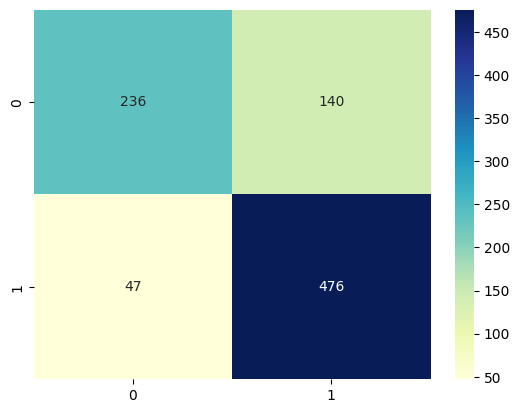

In [22]:
import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report
df = pd.read_csv('./Data/cleandata1.csv')
df=df.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]
origin_y=df['IsABot']
origin_x=df.drop('IsABot', axis=1)
# scaler = StandardScaler()
# origin_x = scaler.fit_transform(origin_x)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(origin_x,origin_y, test_size=0.3, random_state=42)

# Separate labeled and unlabeled data
labeled_data = df[df['IsABot'] != -1]
x_labeled_data = labeled_data.drop('IsABot', axis=1)
x_unlabeled_data = df[df['IsABot'] == -1].drop('IsABot', axis=1)
y_labeled_data= np.copy(labeled_data['IsABot'])
# Train LabelPropagation model on the data
label_prop_model =Pipeline([
     # Transforming the data with PCA
    ('rf', LabelPropagation(max_iter=10000)) # Training a random forest classifier on the data
]) 
label_prop_model.fit(X_train, y_train)

# Generate predictions for the labeled data
y_pred_train = label_prop_model.predict(X_train)
predicted_labels = label_prop_model.predict(X_test[y_test!=-1])
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test[y_test!=-1], predicted_labels))
print(classification_report(y_test[y_test!=-1], predicted_labels))
cm = metrics.confusion_matrix(y_test[y_test!=-1], predicted_labels)
# print('Confusion matrix\n', cm)
cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()


In [30]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import KFold, cross_val_score
from sklearn.semi_supervised import LabelPropagation
from sklearn.metrics import classification_report
df = pd.read_csv('./Data/cleandata1.csv')
df=df.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]
origin_y=df['IsABot']
origin_x=df.drop('IsABot', axis=1)
# scaler = StandardScaler()
# origin_x = scaler.fit_transform(origin_x)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(origin_x,origin_y, test_size=0.3, random_state=42)

# Separate labeled and unlabeled data
labeled_data = df[df['IsABot'] != -1]
x_labeled_data = labeled_data.drop('IsABot', axis=1)
x_unlabeled_data = df[df['IsABot'] == -1].drop('IsABot', axis=1)
y_labeled_data= np.copy(labeled_data['IsABot'])
# Train LabelPropagation model on the data
label_prop_model =Pipeline([
     # Transforming the data with PCA
    ('rf', LabelPropagation(max_iter=10000)) # Training a random forest classifier on the data
]) 

k_folds = KFold(n_splits = 10)
scores = cross_val_score(label_prop_model, X_train, y_train, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.22241225943719423

d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabil

Average CV Score:  0.22241225943719423


d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:231: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer


# self training

d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelfTrainingClassifier was fitted without feature names
  warnings.warn(
d:\dsi\PFE\AI\venv\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but SelfTrainingClassifier was fitted without feature names
  warnings.warn(



 Training Accuracy score: 0.9982499124956248
Testing Accuracy score: 0.9258741258741259
              precision    recall  f1-score   support

         0.0       0.92      0.93      0.93       353
         1.0       0.93      0.92      0.93       362

    accuracy                           0.93       715
   macro avg       0.93      0.93      0.93       715
weighted avg       0.93      0.93      0.93       715



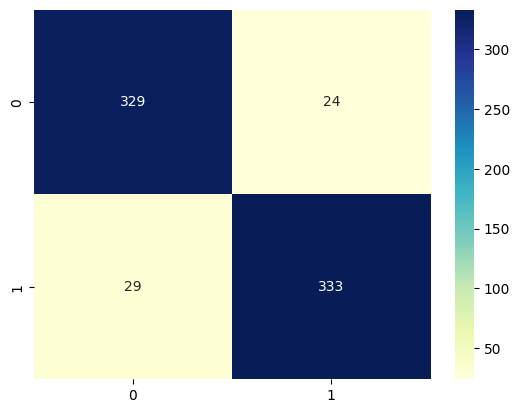

In [27]:

import numpy as np
from sklearn import datasets
from sklearn.semi_supervised import SelfTrainingClassifier

from sklearn.metrics import classification_report
df = pd.read_csv('./Data/cleandata1.csv')
df=df.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]
origin_y=df['IsABot']
origin_x=df.drop('IsABot', axis=1)


labeled_data = df[df['IsABot'] != -1]
x_labeled_data = labeled_data.drop('IsABot', axis=1)
x_unlabeled_data = df[df['IsABot'] == -1].drop('IsABot', axis=1)
y_labeled_data= np.copy(labeled_data['IsABot'])

smote = SMOTE(random_state=10)
x_labeled_data, y_labeled_data =smote.fit_resample(x_labeled_data,y_labeled_data)
x_labeled_data_train, x_labeled_data_test, y_labeled_data_train,y_labeled_data_test = train_test_split(x_labeled_data,y_labeled_data, test_size=0.2, random_state=42)

rf = RandomForestClassifier( random_state=42)
self_training_model = SelfTrainingClassifier(rf)

combined_X = np.concatenate((x_labeled_data_train, x_unlabeled_data))
combined_y = np.concatenate((y_labeled_data_train, np.full(len(x_unlabeled_data), -1)))

self_training_model.fit(combined_X,combined_y)

y_pred_train = self_training_model.predict(x_labeled_data_train)
predicted_labels = self_training_model.predict(x_labeled_data_test)

print("\n Training Accuracy score:",metrics.accuracy_score(y_labeled_data_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_labeled_data_test, predicted_labels))
print(classification_report(y_labeled_data_test, predicted_labels))
cm = metrics.confusion_matrix(y_labeled_data_test, predicted_labels)

cm_matrixNB = pd.DataFrame(data=cm, )
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()

# cross validation

In [29]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender
import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
df = pd.read_csv('./Data/cleandata1.csv')
df=df.loc[:,['HasProfilePicture', 'following', 'follower',
       'HasAccountDescription', 'likes', 'posts', 'AverageNumberOfHashtags',
       'AverageNumberOfComments', 'AverageNumberOfShare',
       'AverageNumberOfLikes', 'AverageNumberOfLinkedProfiles',
       'AverageNumberOfViews', 'IsABot']]

origin_y=df['IsABot']
origin_x=df.drop('IsABot', axis=1)

X_train, X_test, y_train, y_test = train_test_split(origin_x,origin_y, test_size=0.2, random_state=42)

labeled_data = df[df['IsABot'] != -1]
x_labeled_data = labeled_data.drop('IsABot', axis=1)
x_unlabeled_data = df[df['IsABot'] == -1].drop('IsABot', axis=1)
y_labeled_data= np.copy(labeled_data['IsABot'])

smote = SMOTE(random_state=10)
x_labeled_data, y_labeled_data =smote.fit_resample(x_labeled_data,y_labeled_data)
x_labeled_data_train, x_labeled_data_test, y_labeled_data_train,y_labeled_data_test = train_test_split(x_labeled_data,y_labeled_data, test_size=0.3, random_state=42)

rf = RandomForestClassifier( random_state=42)
self_training_model = SelfTrainingClassifier(rf)

combined_X = np.concatenate((x_labeled_data_train, x_unlabeled_data))
combined_y = np.concatenate((y_labeled_data_train, np.full(len(x_unlabeled_data), -1)))

k_folds = KFold(n_splits = 10)
scores = cross_val_score(self_training_model, combined_X, combined_y, cv = k_folds)
print("Average CV Score: ", scores.mean())
# Average CV Score:  0.2360706860706861

Average CV Score:  0.2360706860706861
